# Regresión logística

Vamos a resolver un porblema de clasificación binaria usando el método de Regresión logística. 
Primero con tan solo un predictor y despuñés usando más de uno, lo que viene llamándose: regresión logísitca múltiple.


El __objetivo principal__ del notebook es aprender como se evalúa un algoritmo de clasificación.
    
    

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import datasets
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams['font.size'] = 20

### A. Simulación de la función logística

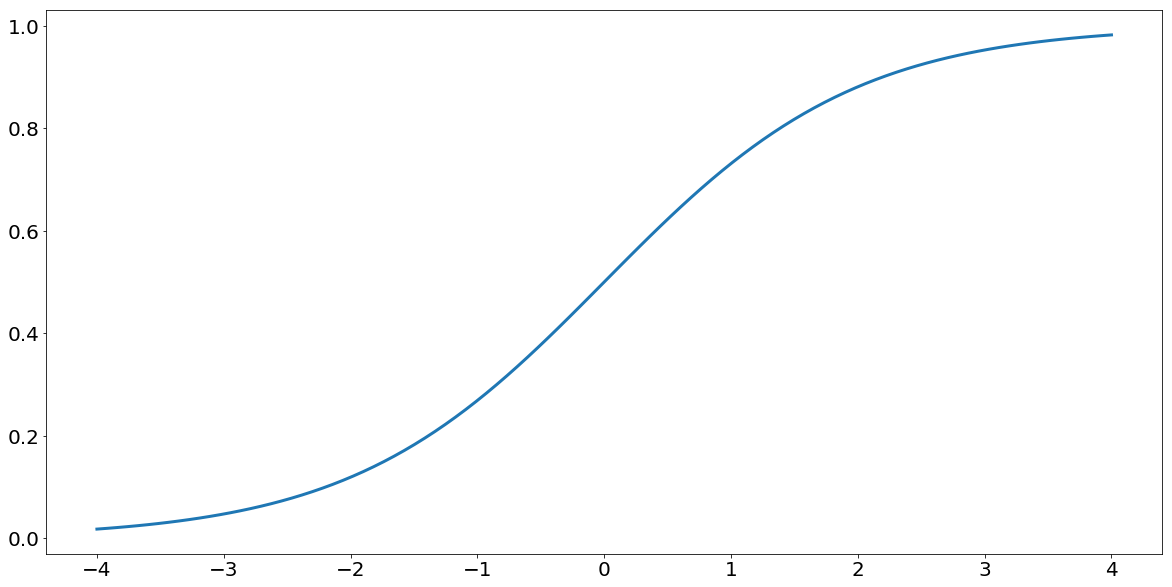

In [3]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

t = np.linspace(-4, 4, 100)
plt.plot(t, sigmoid(t),linewidth=3.0)

plt.show()

## B. Formulación del problema:

El objetivo es dado unos datos extraidos de una imágenes predecir si el tumor observado en las imágenes es maligno o no.

El dataset lo podemos encontrar en el paquete de datasets de sklearn.



### B.1. Bajando nuestro dataset y primera exploración

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
list(data.target_names)

['malignant', 'benign']

In [5]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

Entonces si el target es 1 significa que el tumos es __malignant__ y cuando es 0 el tumor es  __benign__.

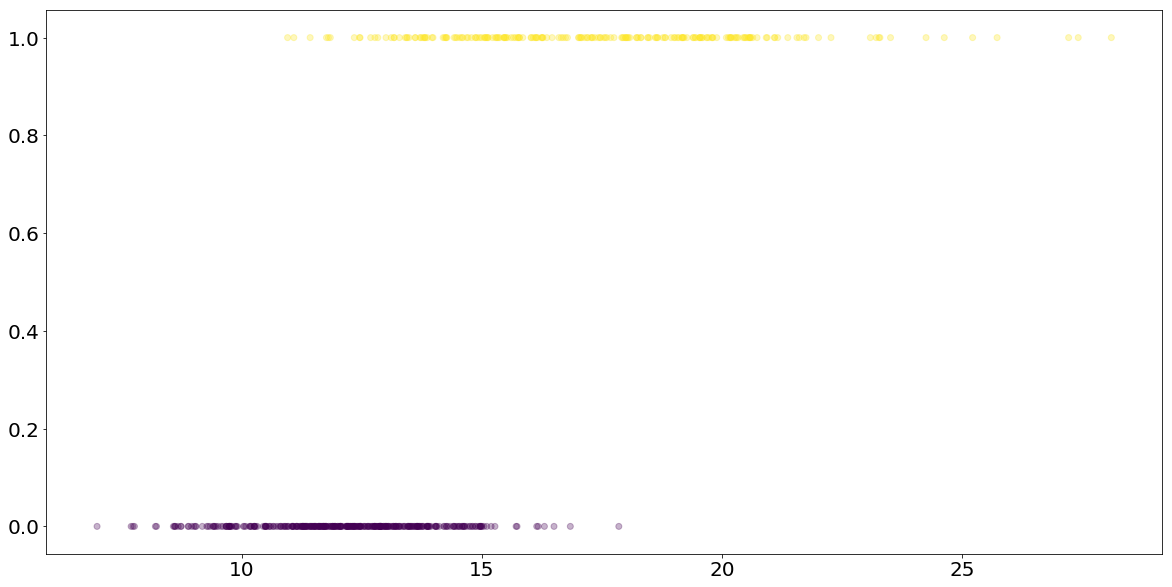

In [6]:
y = data.target == 0 # if zero then we detect malignant tumor.

plt.scatter(data.data[:, [0]], y, alpha=0.3, c=y)
plt.show()

### B.2. Preparación de los datos

In [7]:
# 1. Prepare data
X = data.data[:, [0]] # only one column, radius
y = data.target == 0

### B.3. Separación de conjuntos de entrenamiento y de test

In [8]:
# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

### B.4. Creación del modelo

In [9]:
# 3. Build a model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

### B.5. Entrenamiento del modelo

In [10]:
# 4. Fit model to train data.
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### B.6. Evaluación en el conjunto de test

In [11]:
# 5. Caluate prediction on test set
y_test_hat = clf.predict(X_test)

### ¿Cómo evaluamos el performance del algoritmo para una regresiñón logística?

Tenemos diferentes formas de evaluar un modelo de regresión logistica.

* accuracy (o exactitud),
* confusion matrix,
* precision and recall.
* F-score

## Metrica 1: Accuracy ( o exactitud)

Básicamente es calcular qué porcentaje de clases han sido predichas de forma correcta.

In [12]:
n_sample = len(y_test)
correct_prediction = sum(y_test == y_test_hat)

# Accuracy
correct_prediction/n_sample

0.9122807017543859

90%! no suena mal!. 

También podemos calcular esto con una función de `sklearn`: *accuracy score*

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_hat)

0.9122807017543859

> La regresión logística binaria realmente nos da una porbabilidad de que una observación sea maligna o benigna. Esta se puede ver como sigue:
    

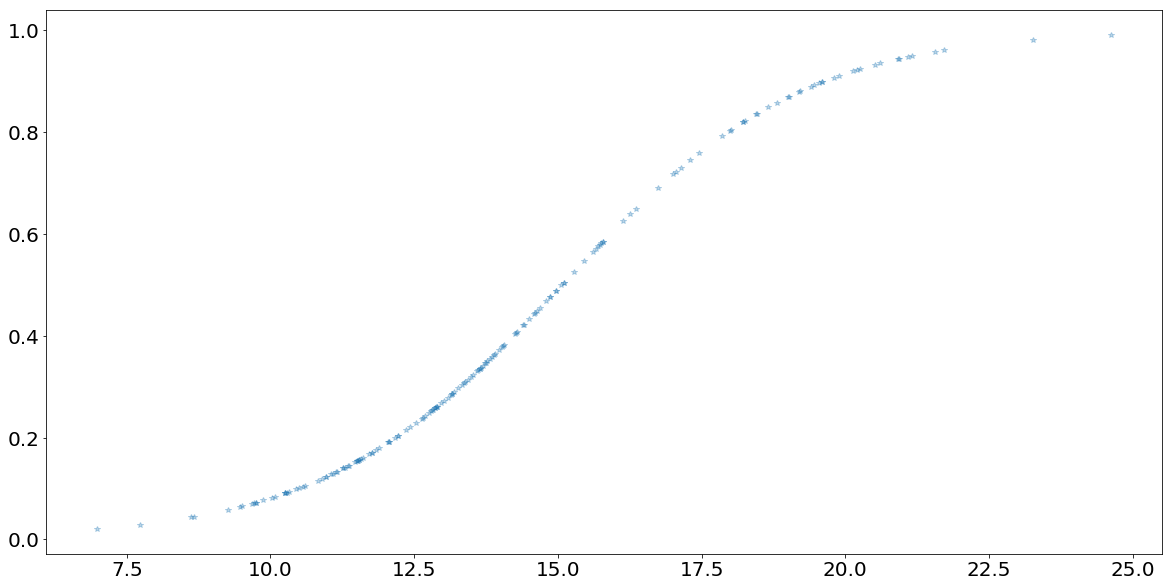

In [14]:
y_test_proba = clf.predict_proba(X_test)[:, 1]
plt.plot(X_test,y_test_proba,'*',alpha=0.3)

La elección de qué puntos se van hacia la clase de tumor maligno o benigno es un corte que ponemos nosotros.
En este caso la función interna de *sklearn* hace el corte con una porbabilidad del 50%. Esto lo podemos verificar como sigue:

In [15]:
y_test_proba = clf.predict_proba(X_test)[:, 1]
y_test_prediction = y_test_proba >= 0.5
correct_prediction = sum(y_test == y_test_prediction)

# Accuracy
correct_prediction/n_sample

0.9122807017543859

## Métrica 2: Matriz de confusión

In [16]:
true_positive = sum(y_test & y_test_prediction)
false_positive = sum(~y_test & y_test_prediction)
true_negative = sum(~y_test & ~y_test_prediction)
false_negative = sum(y_test & ~y_test_prediction)

pd.DataFrame({
        "Predicted 0": [true_negative, false_negative], 
        "Predicted 1": [false_positive, true_positive]
    },
    index= ["Actual 0", "Actual 1"]
)

,Predicted 0,Predicted 1
Actual 0,105,3
Actual 1,12,51


Tenemos pues 105 personas bien clasificadas y 12 mal dentro de la clase de tumor benigno y en el caso de tumor maligno tenemos 51 bien clasidficadas y 3 mal.

La matriz de confusión puede sEsta matriz de confusiñon puede ser calaculada con una función de sklearn: *confusion_matrix*

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_hat)
cm

array([[105,   3],
       [ 12,  51]])

De esta matriz podemos calcular también la métrica de *accuracy*:

In [18]:
cm.diagonal().sum()/cm.sum()

0.9122807017543859

Dibujando la matriz de confusion:

In [19]:
import seaborn as sns
def get_cm_df(cm):
    labels = [0, 1]
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    return cm_df

cm_df = get_cm_df(cm)
cm_df

Predicted,0,1
Actual,,
0,105,3
1,12,51


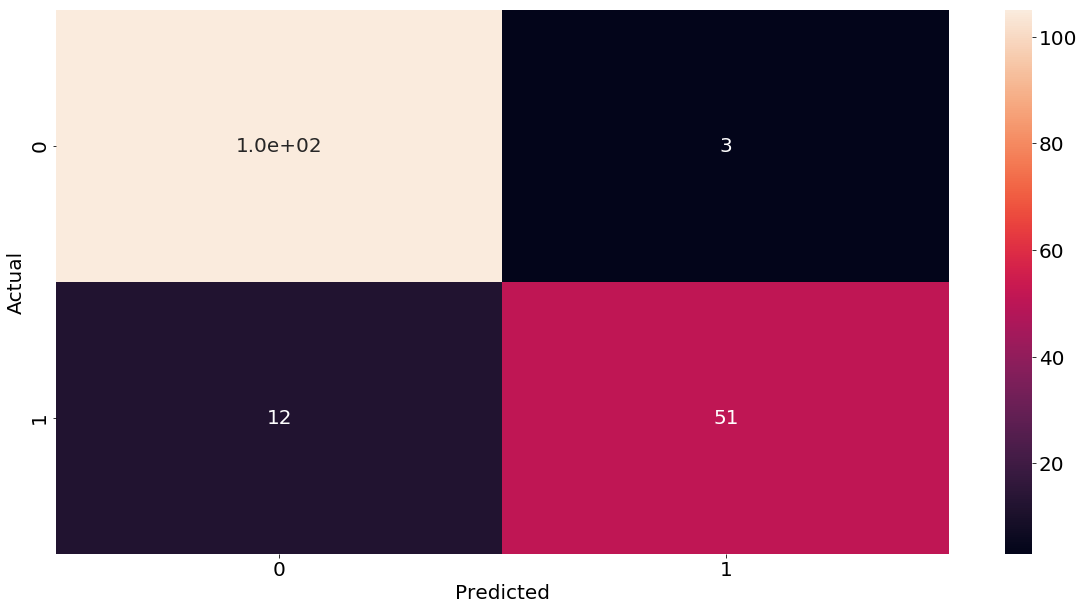

In [20]:
sns.heatmap(cm_df,annot=True)

## Metrica 3: Precision and recall

In [21]:
precision = true_positive/(true_positive + false_positive)
recall = true_positive/(true_positive + false_negative)
precision, recall

(0.9444444444444444, 0.8095238095238095)

De nuevo existen funciones para calcularlas:

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_test_hat), recall_score(y_test, y_test_hat)

(0.9444444444444444, 0.8095238095238095)

Depende del problema buscaremos tener mñas precision que recall o lo contrario. Juguemos con el threshold de probabilidad de llevar a la clase de éxito o fracaso.


** CAso 1** Si ek threshold lo elegimos a 0.75

In [23]:
def precision_recall(y_true, y_proba, threshold):
    y_hat = y_proba >= threshold
    precision = 1 if sum(y_hat) == 0 else precision_score(y_true, y_hat) # we set precision to 1 if 
                                                                         # there is no ones, this is a bit
                                                                         # techincal so do not worry
    return precision, recall_score(y_true, y_hat)

precision_recall(y_test, y_test_proba, .75)

(0.9714285714285714, 0.5396825396825397)

Aquñí hemos aumentado la proecisión al 97% y la recall ha caido a 54%.

In [24]:
def cm_matrix_from_threshold(y_true, y_proba, threshold):
    y_hat = y_proba >= threshold
    return confusion_matrix(y_true, y_hat)


get_cm_df(cm_matrix_from_threshold(y_test, y_test_proba, .75))

Predicted,0,1
Actual,,
0,107,1
1,29,34


**Caso 2**  Si ahora toma mos un threshold del  25%

In [25]:
precision_recall(y_test, y_test_proba, .25)

(0.5504587155963303, 0.9523809523809523)

Ahora la situación es contraria, hemos bajado a 55% en porecisión y hemo subido a 95% en recall:

In [26]:
get_cm_df(cm_matrix_from_threshold(y_test, y_test_proba, .25))

Predicted,0,1
Actual,,
0,59,49
1,3,60


De esta manera es conveniente hacer la curva de __precision-recall curve__.

Text(0.5, 1.0, 'Curva precision-recall')

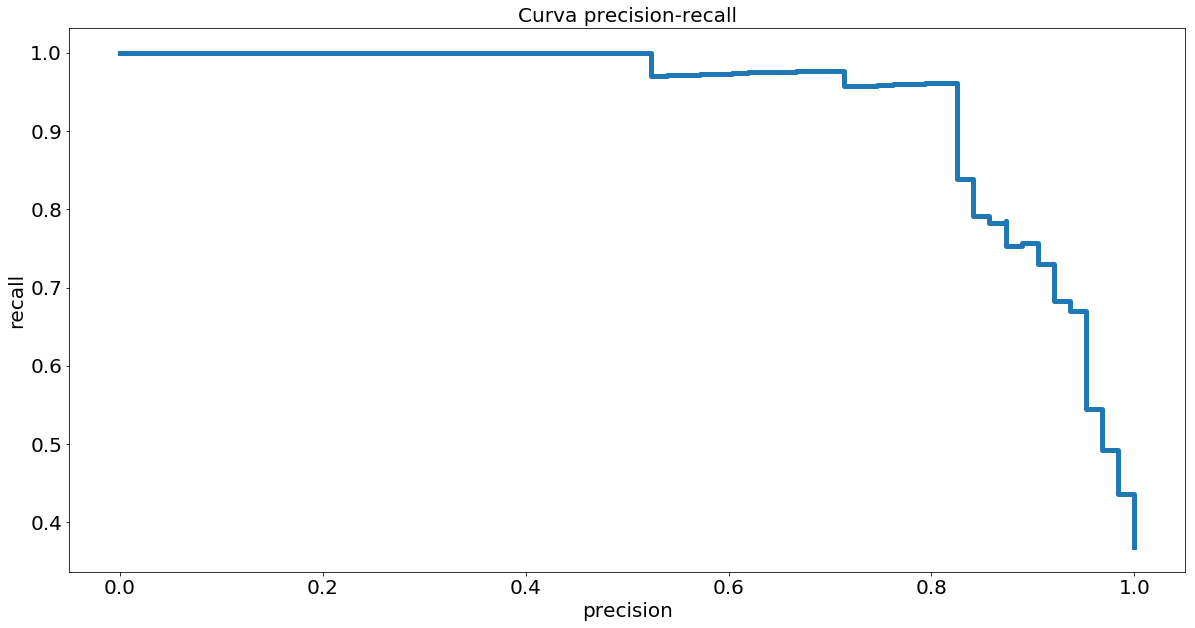

In [27]:
ts = np.linspace(0, 1, 100)
precisions = []
recalls = []
for t in ts:
    p,r = precision_recall(y_test, y_test_proba, t)
    precisions.append(p)
    recalls.append(r)
    
plt.step(recalls, precisions,linewidth=5)
plt.xticks(size=20)
plt.xlabel("precision",size=20)
plt.ylabel("recall",size=20)
plt.yticks(size=20)
plt.title("Curva precision-recall",size=20)

Usando *skelrn*:

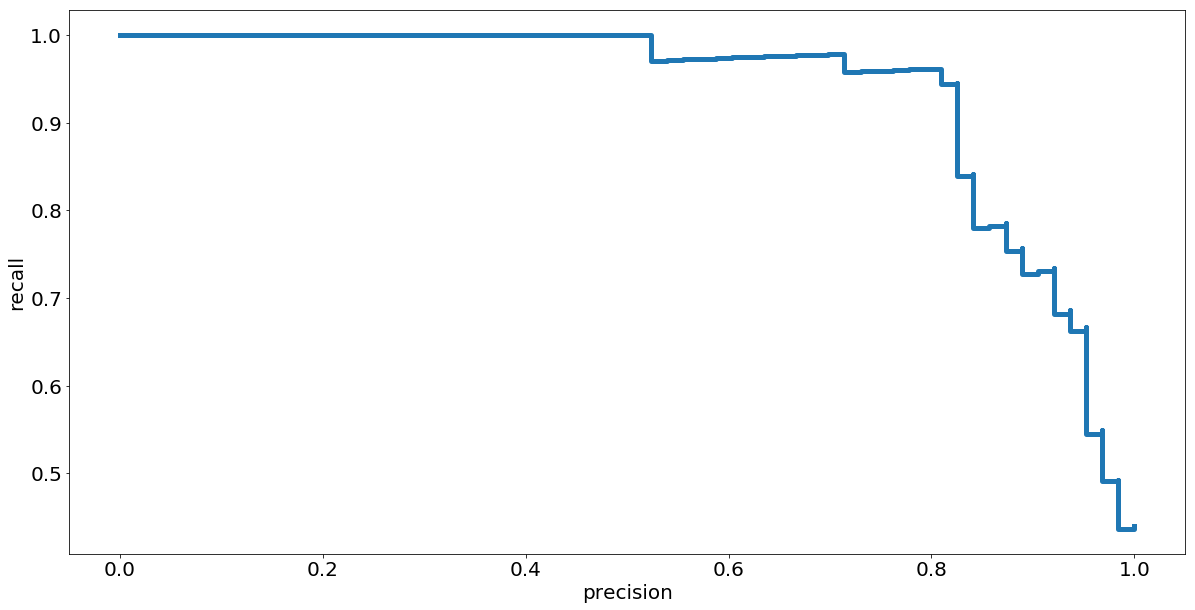

In [28]:
from sklearn.metrics import precision_recall_curve

y_test_score = clf.decision_function(X_test)
precisions, recalls, _ = precision_recall_curve(y_test, y_test_score)
plt.step(recalls, precisions,linewidth=5)
plt.xticks(size=20)
plt.xlabel("precision",size=20)
plt.ylabel("recall",size=20)
plt.yticks(size=20)
plt.show()
plt.show()

### Evaluation 4: F-score

In [29]:
def f_score(precision, recall):
    return 2/(1/precision + 1/recall)

In [30]:
f_score(precision_score(y_test, y_test_hat), recall_score(y_test, y_test_hat))

0.8717948717948718

Or using function form `sklearn`.

In [31]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_hat)

0.8717948717948718

### Evaluation 5: AUC - área por debajo de la curva ROC

Text(0.5, 1.0, 'Curva de ROC')

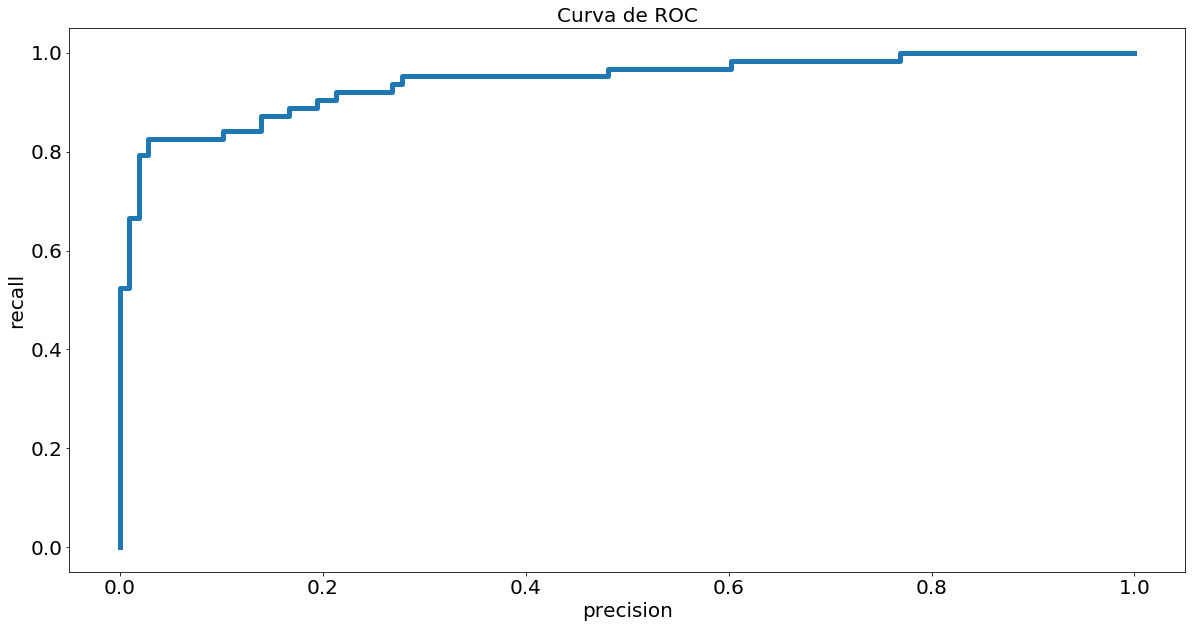

In [32]:
def fpr(y_true, y_pred):
    false_positive = sum(~y_true & y_pred)
    true_negative = sum(~y_true & ~y_pred)
    return false_positive/(false_positive + true_negative)

def fpr_recall(y_true, y_proba, threshold):
    y_hat = y_proba >= threshold
    fpr_score = fpr(y_true, y_hat)
    return fpr_score, recall_score(y_true, y_hat)

ts = np.linspace(0, 1, 100)
fprs = []
recalls = []
for t in ts:
    f,r = fpr_recall(y_test, y_test_proba, t)
    fprs.append(f)
    recalls.append(r)
 
plt.step(fprs, recalls,linewidth=5)
plt.xticks(size=20)
plt.xlabel("precision",size=20)
plt.ylabel("recall",size=20)
plt.yticks(size=20)
plt.title("Curva de ROC",size=20)

Again, package `sklearn` contains convenient function for calculating ROC curve.

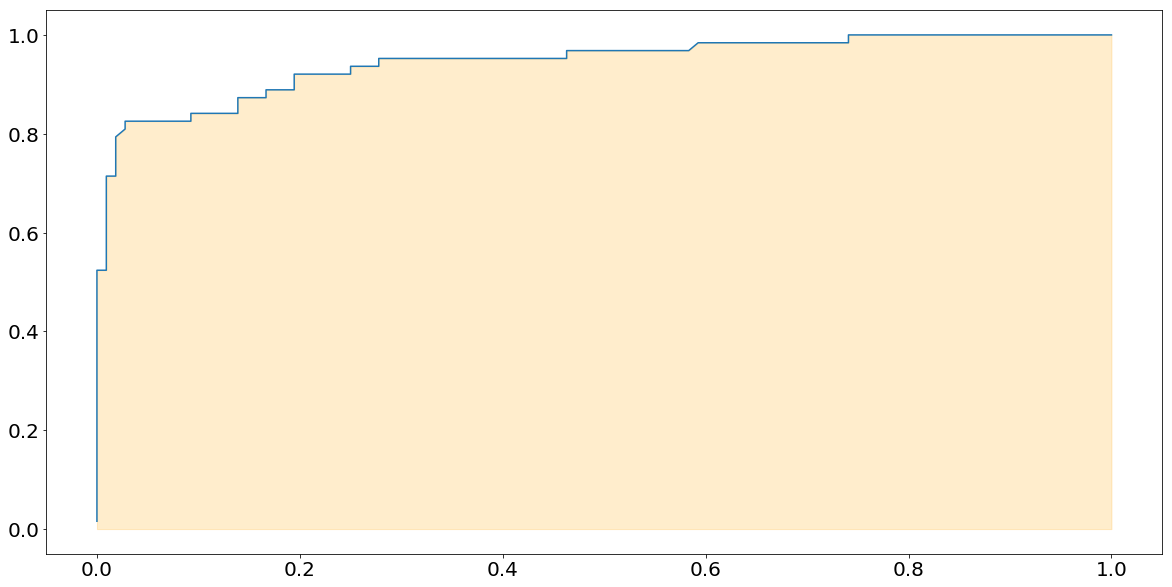

In [33]:
from sklearn.metrics import roc_curve

y_test_score = clf.decision_function(X_test)
fprs, recalls, _ = roc_curve(y_test, y_test_score)

plt.plot(fprs, recalls)
plt.fill_between(fprs, recalls, alpha=0.2, color='orange')
plt.show()

Para calcular el valro del área por debajo de la curva usamos la siguiente función:

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_score)

0.9444444444444444

__Extra__ 

Aqui presentamos una manera alternativa a calcular ROC_auc_score.

In [35]:
total_count = 0
corrects = 0
for i in range(len(y_test)):
    if y_test[i] == 1:
        for j in range(len(y_test)):
            if y_test[j] == 0:
                total_count += 1
                if y_test_score[i] > y_test_score[j]:
                    corrects += 1
                
corrects/total_count

0.9442974720752498

## Todo junto:

In [36]:
# 1. Prepare data
X = data.data[:, [0]]
y = data.target == 0

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# 4. Fit model to train data.
clf.fit(X_train, y_train)

# 5. Evaluate model on test data.
y_test_hat = clf.predict(X_test)
y_test_score = clf.decision_function(X_test)
print("AUC :", roc_auc_score(y_test, y_test_score))
print("F1-score :", f1_score(y_test, y_test_hat))
print("Precision :", precision_score(y_test, y_test_hat))
print("Recall :", recall_score(y_test, y_test_hat))
print("Accuracy score :", accuracy_score(y_test, y_test_hat))

AUC : 0.9444444444444444
F1-score : 0.8717948717948718
Precision : 0.9444444444444444
Recall : 0.8095238095238095
Accuracy score : 0.9122807017543859


## Multiple Logistic Regression

Ahora vamos a mejorar el modelo anterior añadiendo más predictores, en particular *radius*, *texture* y *perimeter*.

In [37]:
# 1. Prepare data
X = data.data[:, [0, 1, 2,3,4]]
y = data.target == 0

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# 4. Fit model to train data.
clf.fit(X_train, y_train)

# 5. Evaluate model on test data.
y_test_hat = clf.predict(X_test)
y_test_score = clf.decision_function(X_test)
print("AUC :", roc_auc_score(y_test, y_test_score))
print("F1-score :", f1_score(y_test, y_test_hat))
print("Precision :", precision_score(y_test, y_test_hat))
print("Recall :", recall_score(y_test, y_test_hat))
print("Accuracy score :", accuracy_score(y_test, y_test_hat))

AUC : 0.9706055261610816
F1-score : 0.9032258064516128
Precision : 0.9180327868852459
Recall : 0.8888888888888888
Accuracy score : 0.9298245614035088


Observando AUC este es ligeramente mejor pero el F-score es más bajo, por lo que no es fácil decidir que modelo es el mejor.

Interpretando los coeficientes de la regresión logística

Text(0.5, 1.0, 'Importancia de los predictores')

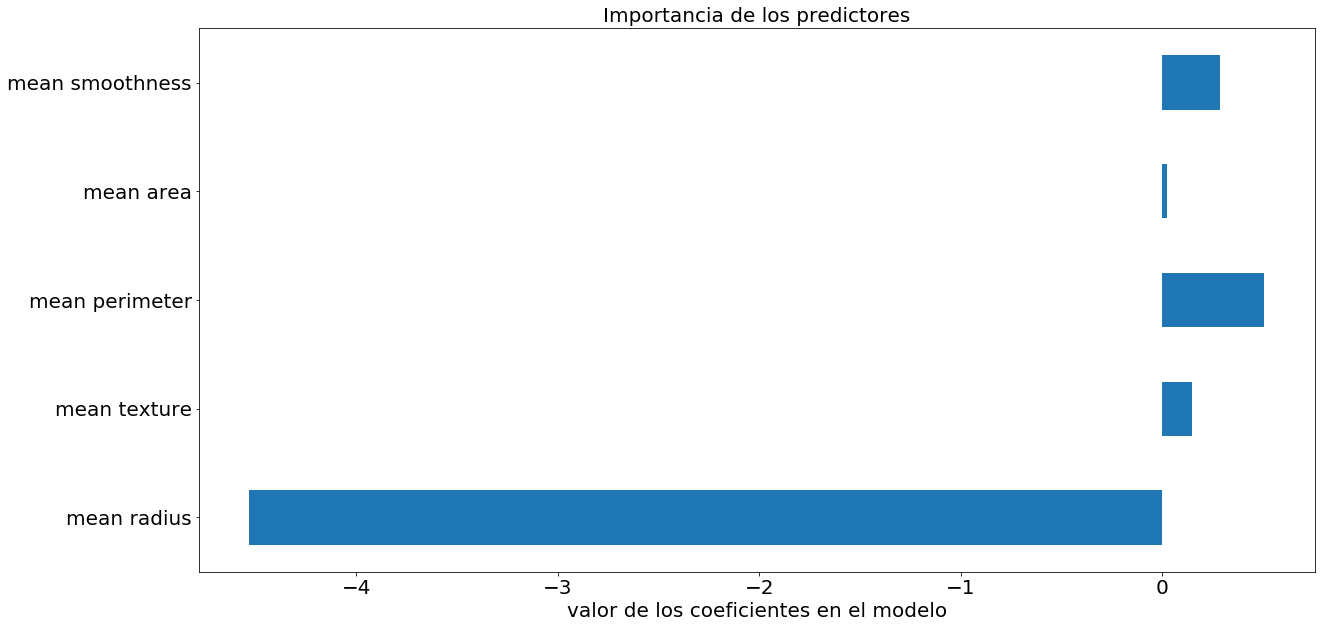

In [38]:
coef  = pd.DataFrame({'features': data.feature_names[[0, 1, 2,3,4]],
             'coefficients': clf.coef_[0]})
coef.index = coef.features
coef.plot(kind='barh',legend=False)
plt.xticks(size=20)
plt.xlabel("valor de los coeficientes en el modelo",size=20)
plt.ylabel("",size=20)
plt.yticks(size=20)
plt.title("Importancia de los predictores",size=20)